In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
import sys
sys.path.insert(0,'drive/Colab')

In [ ]:
from google.colab import files


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving pmsm_temperature_data.csv to pmsm_temperature_data.csv
User uploaded file "pmsm_temperature_data.csv" with length 133146381 bytes


In [ ]:
uploaded

In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.StringIO(uploaded['pmsm_temperature_data.csv'].decode('utf-8')))
print(df)


         ambient   coolant       u_d  ...  stator_tooth  stator_winding  profile_id
0      -0.752143 -1.118446  0.327935  ...     -2.066143       -2.018033           4
1      -0.771263 -1.117021  0.329665  ...     -2.064859       -2.017631           4
2      -0.782892 -1.116681  0.332771  ...     -2.064073       -2.017343           4
3      -0.780935 -1.116764  0.333700  ...     -2.063137       -2.017632           4
4      -0.774043 -1.116775  0.335206  ...     -2.062795       -2.018145           4
...          ...       ...       ...  ...           ...             ...         ...
998065 -0.047497  0.341638  0.331475  ...      0.836084        0.494725          72
998066 -0.048839  0.320022  0.331701  ...      0.834438        0.494279          72
998067 -0.042350  0.307415  0.330946  ...      0.833936        0.492666          72
998068 -0.039433  0.302082  0.330987  ...      0.830504        0.490581          72
998069 -0.043803  0.312666  0.330830  ...      0.828046        0.489382     

In [ ]:
df.head(10)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
5,-0.762936,-1.116955,0.334901,-1.303017,-1.222429,-0.248197,1.031031,-0.246341,-2.522203,-1.831931,-2.062549,-2.017884,4
6,-0.749228,-1.116170,0.335014,-1.302082,-1.222430,-0.247914,1.030493,-0.246162,-2.522538,-1.833012,-2.062115,-2.017243,4
7,-0.738450,-1.113986,0.336256,-1.305155,-1.222432,-0.248321,1.030107,-0.246035,-2.522844,-1.832182,-2.061953,-2.017213,4
8,-0.730910,-1.111828,0.334905,-1.303790,-1.222432,-0.247785,1.029851,-0.245981,-2.522808,-1.831576,-2.062443,-2.017739,4
9,-0.727130,-1.109486,0.335988,-1.305633,-1.222431,-0.248294,1.029636,-0.245888,-2.522677,-1.831438,-2.062317,-2.018180,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
ambient           998070 non-null float64
coolant           998070 non-null float64
u_d               998070 non-null float64
u_q               998070 non-null float64
motor_speed       998070 non-null float64
torque            998070 non-null float64
i_d               998070 non-null float64
i_q               998070 non-null float64
pm                998070 non-null float64
stator_yoke       998070 non-null float64
stator_tooth      998070 non-null float64
stator_winding    998070 non-null float64
profile_id        998070 non-null int64
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


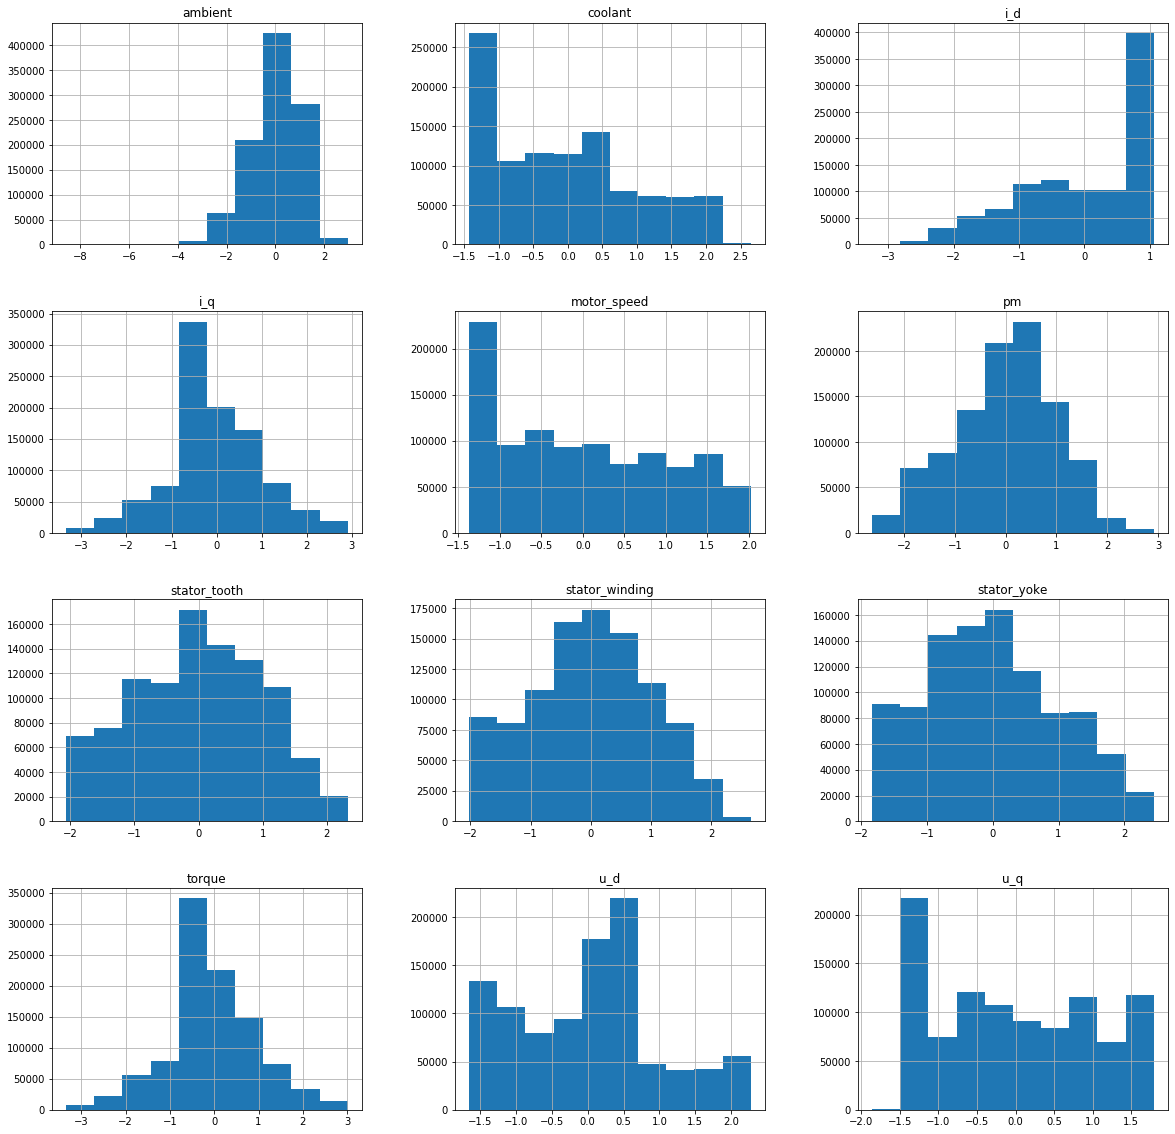

In [ ]:
data.hist(figsize = (20,20))
plt.show()

### ***DATA*** **ÖN HAZIRLIK** **(PRE PROCESSİNG) **






In [ ]:
df=df.drop(columns=['profile_id'])
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145


In [ ]:
#Featurlarımı a,b ve c olarak 3 parçaya ayırıyorum.

a=df[['pm','stator_yoke','stator_tooth','stator_winding']]
b=df[['torque','i_q','u_d']]
d=df[['ambient','coolant','u_q','motor_speed','i_d']]

In [ ]:
a.head()

,pm,stator_yoke,stator_tooth,stator_winding
0,-2.522071,-1.831422,-2.066143,-2.018033
1,-2.522418,-1.830969,-2.064859,-2.017631
2,-2.522673,-1.830400,-2.064073,-2.017343
3,-2.521639,-1.830333,-2.063137,-2.017632
4,-2.521900,-1.830498,-2.062795,-2.018145


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #a 'daki featurlarımı 2 'ye düşürüyorum.
principalComponents_a = pca.fit_transform(a) #fit.transform demezsem işlemi gerçekleştirmiyor,bu yüzden bu şart.
principalDf_a = pd.DataFrame(data = principalComponents_a
             , columns = ['principal component a_1', 'principal component a_2'])

In [ ]:
principalDf_a.head()

,principal component a_1,principal component a_2
0,-4.183849,0.710603
1,-4.182892,0.711435
2,-4.182157,0.712094
3,-4.181306,0.711346
4,-4.181587,0.711486


In [ ]:
#Aynı PCA işlemlerini b için yapıyorum.

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents_b = pca.fit_transform(b)
principalDf_b = pd.DataFrame(data = principalComponents_b
             , columns = ['principal component b_1'])

In [ ]:
#Şimdi concat komutu ile a ve b featurlarımı birleştireceğim.
c= pd.concat([principalDf_a, principalDf_b], axis = 1)
c.head()

,principal component a_1,principal component a_2,principal component b_1
0,-4.183849,0.710603,0.466638
1,-4.182892,0.711435,0.466947
2,-4.182157,0.712094,0.468818
3,-4.181306,0.711346,0.469524
4,-4.181587,0.711486,0.470185


In [ ]:
#Son olarak d featurlarımı da c ile birleştirerek datamı kullanıma uygun hale getiriyorum
final=pd.concat([c, d], axis=1)
final.head()

,principal component a_1,principal component a_2,principal component b_1,ambient,coolant,u_q,motor_speed,i_d
0,-4.183849,0.710603,0.466638,-0.752143,-1.118446,-1.297858,-1.222428,1.029572
1,-4.182892,0.711435,0.466947,-0.771263,-1.117021,-1.297686,-1.222429,1.029509
2,-4.182157,0.712094,0.468818,-0.782892,-1.116681,-1.301822,-1.222428,1.029448
3,-4.181306,0.711346,0.469524,-0.780935,-1.116764,-1.301852,-1.222430,1.032845
4,-4.181587,0.711486,0.470185,-0.774043,-1.116775,-1.303118,-1.222429,1.031807


In [ ]:
df_x=final.drop(["motor_speed"],axis=1) # x ekseninde kullanacağım özellikler arasından drop komutu ile motor_speed ' i çıkarıyorum.
df_y=pd.DataFrame(final['motor_speed']) #motor_speed ' i y eksenine atıyorum.
df_x.head()


,principal component a_1,principal component a_2,principal component b_1,ambient,coolant,u_q,i_d
0,-4.183849,0.710603,0.466638,-0.752143,-1.118446,-1.297858,1.029572
1,-4.182892,0.711435,0.466947,-0.771263,-1.117021,-1.297686,1.029509
2,-4.182157,0.712094,0.468818,-0.782892,-1.116681,-1.301822,1.029448
3,-4.181306,0.711346,0.469524,-0.780935,-1.116764,-1.301852,1.032845
4,-4.181587,0.711486,0.470185,-0.774043,-1.116775,-1.303118,1.031807


In [ ]:
df_y.head()

,motor_speed
0,-1.222428
1,-1.222429
2,-1.222428
3,-1.222430
4,-1.222429


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error


# **MULTIPLE** **LINEAR** **REGRESSION**

In [ ]:
#train ve test dosyalarımı oluşturuyorum. test_size'ı 0.33 olarak belirledim yani test datam %33 ' lük kısmı oluşturacak. Random_state komutu ise her kodu çalıştırdığımda farklı train ve test dataları oluşmasın diye uygulanır.
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y, test_size=0.2,random_state = 42)
lr = LinearRegression().fit(x_train,y_train) #fit ediyorum yani modelimi oluşturuyorum.

#predict - tahminleme
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print('Multiple Linear Regression Score : ',lr.score(x_test,y_test))
y_test_pred

Multiple Linear Regression Score :  0.9045746298679082


array([[ 1.22123037],
       [-0.15518841],
       [-0.16020277],
       ...,
       [ 0.99135515],
       [-1.50180486],
       [-1.38674678]])

In [ ]:
print('Multiple Linear Regression Score : ',lr.score(x_train,y_train))

Multiple Linear Regression Score :  0.9043435563967039


## **POLYNOMIAL** **REGRESSION**

In [ ]:
quad = PolynomialFeatures (degree = 2) #polynomial regression'un matematiksel formulü x^2 kareli ifadeden oluştuğu için bunu yapıyoruz.
x_quad = quad.fit_transform(df_x) #fit_transform şart.

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,df_y, test_size=0.2,random_state = 42) #yüzde 20 'lik test oluşturdum.

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)


print('Polynomial Linear Regression:' ,plr.score(X_test,Y_test))
Y_test_pred

Polynomial Linear Regression: 0.9849542841724784


array([[ 1.47588933],
       [-0.10748704],
       [-0.32406591],
       ...,
       [ 1.31983458],
       [-1.25071351],
       [-1.23323485]])

## [**GERÇEK DEĞERLER İLE FİT ETTİĞİM DEĞERLERİN KARŞILAŞTIRILMASI**]

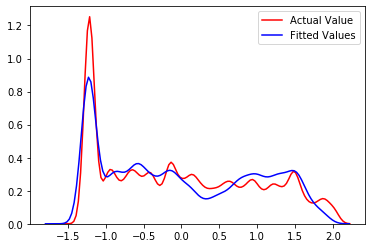

In [ ]:
import seaborn as sns

ax1 = sns.distplot(df_y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

# **Coefficents ve Variance**

In [ ]:
from sklearn import linear_model,metrics
#linear regression modelimi oluşturuyorum
reg=linear_model.LinearRegression()

#train modelim
reg.fit(x_train,y_train)

#regression coefficients
print("Coefficients: \n", reg.coef_)

#Variance score
print("Variance score: {}".format(reg.score(x_test,y_test)))

Coefficients: 
 [[-0.0353401  -0.30241192  0.04341756 -0.05949022  0.13439247  0.60529809
  -0.67276621]]
Variance score: 0.9045746298679082



# **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

dtree = DecisionTreeRegressor(max_depth=5).fit(x_train,y_train) # Ağacın maksimum derinliği 5 olsun.
print("Training:"+str(dtree.score(x_train,y_train)))
print("Test:"+str(dtree.score(x_test,y_test)))



Training:0.9576709879857286
Test:0.9578706610994737


# **Evaluation decision tree regression model**

In [ ]:
from sklearn.metrics import r2_score
print('r2 score: ', r2_score(y_train,pred))

r2 score:  0.9576709879857286
